# Pirate Pain: Data Analysis & Cleaning

This notebook summarizes the data analysis and cleaning process based on the advice:

> "Every column, a path it promises. But some paths, only into the fog they lead."

> "To separate the wheat from the chaff, this the first duty of the wise it is."

## Step 1: Imports and Initial Load

First, we import the necessary libraries and load our feature and label files, merging them into a single DataFrame.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default figure size and theme
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_theme(style='whitegrid')

try:
    df_features = pd.read_csv('data/pirate_pain_train.csv', dtype={'sample_index': 'str'})
    df_labels = pd.read_csv('data/pirate_pain_train_labels.csv', dtype={'sample_index': 'str'})
    df = pd.merge(df_features, df_labels, on='sample_index', how='inner')
    print("Data Loaded and Merged Successfully.")
    print(f"Total rows: {len(df)}, Total columns: {len(df.columns)}")
except FileNotFoundError:
    print("Error: Make sure 'pirate_pain_train.csv' and 'pirate_pain_train_labels.csv' are in a 'data' subfolder.")

Data Loaded and Merged Successfully.
Total rows: 105760, Total columns: 41


## Step 2: Initial Inspection (The "First Look")

> "Have you looked at your data, before bestowing it upon the model?"

We'll run `.info()` to check for missing values and data types, and `.describe()` to get a first look at outliers and scales.

In [17]:
print("--- Data Types and Missing Values ---")
df.info()

--- Data Types and Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105760 entries, 0 to 105759
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sample_index   105760 non-null  object 
 1   time           105760 non-null  int64  
 2   pain_survey_1  105760 non-null  int64  
 3   pain_survey_2  105760 non-null  int64  
 4   pain_survey_3  105760 non-null  int64  
 5   pain_survey_4  105760 non-null  int64  
 6   n_legs         105760 non-null  object 
 7   n_hands        105760 non-null  object 
 8   n_eyes         105760 non-null  object 
 9   joint_00       105760 non-null  float64
 10  joint_01       105760 non-null  float64
 11  joint_02       105760 non-null  float64
 12  joint_03       105760 non-null  float64
 13  joint_04       105760 non-null  float64
 14  joint_05       105760 non-null  float64
 15  joint_06       105760 non-null  float64
 16  joint_07       105760 non-null  floa

In [18]:
print("--- Numeric Data Summary (for outliers/scale) ---")
df.describe()

--- Numeric Data Summary (for outliers/scale) ---


,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,joint_00,joint_01,joint_02,joint_03,joint_04,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
count,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,...,1.057600e+05,1.057600e+05,1.057600e+05,1.057600e+05,1.057600e+05,105760.000000,105760.000000,105760.000000,105760.000000,105760.0
mean,79.500000,1.633746,1.654851,1.653640,1.663134,0.943095,0.916955,0.779296,0.767921,0.709186,...,3.972126e-05,4.176794e-05,3.561780e-05,3.138109e-05,1.024604e-04,0.041905,0.058244,0.049886,0.062273,0.5
std,46.187338,0.682423,0.669639,0.666649,0.661994,0.202051,0.197608,0.295605,0.300787,0.418058,...,4.974496e-03,5.472244e-03,1.235450e-03,4.062914e-04,3.206128e-03,0.060293,0.079819,0.060773,0.072597,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001015,0.005403,0.000000,...,0.000000e+00,1.510494e-07,0.000000e+00,1.063144e-08,0.000000e+00,0.000203,0.000000,0.000000,0.000000,0.5
25%,39.750000,2.000000,2.000000,2.000000,2.000000,0.828277,0.811445,0.568850,0.520020,0.184585,...,6.545878e-08,3.321650e-07,3.275038e-07,2.841805e-07,7.161332e-07,0.009885,0.012652,0.016290,0.019638,0.5
50%,79.500000,2.000000,2.000000,2.000000,2.000000,1.005126,0.979468,0.909549,0.914834,0.930007,...,8.302747e-07,1.095971e-06,1.024209e-06,8.746147e-07,3.126723e-06,0.021898,0.031739,0.031843,0.039041,0.5
75%,119.250000,2.000000,2.000000,2.000000,2.000000,1.081039,1.056611,0.995187,0.994324,1.036497,...,2.800090e-06,3.079465e-06,3.021830e-06,2.507548e-06,9.946107e-06,0.048579,0.071051,0.058741,0.079518,0.5
max,159.000000,2.000000,2.000000,2.000000,2.000000,1.407968,1.334613,1.306046,1.254729,1.359204,...,1.442198e+00,1.305001e+00,2.742411e-01,3.643074e-02,9.473540e-01,1.223617,1.187419,1.412037,1.370765,0.5


In [19]:
print("--- Object/Categorical Data Summary ---")
df.describe(include='object')

--- Object/Categorical Data Summary ---


,sample_index,n_legs,n_hands,n_eyes,label
count,105760,105760,105760,105760,105760
unique,661,2,2,2,3
top,660,two,two,two,no_pain
freq,160,104800,104800,104800,81760


### Initial Findings:

1.  **No Missing Data**: `Non-Null Count` is 105760 for all columns.
2.  **Odd Categories**: `n_legs`, `n_hands`, and `n_eyes` are `object` (string) types.
3.  **Potential Outliers**: `joint_13` through `joint_25` (and others) have a 75th percentile very close to 0, but a `max` value that is much larger. This suggests extreme outliers or skew.

## Step 3: "The Foggy Path" (Zero Variance)

> "Perhaps one column, the same value always repeats (zero variance). What guide can this be?"

We'll check the number of unique values in each column. Any column with only 1 unique value is useless.

In [20]:
unique_counts = df.nunique()
print("--- Unique Value Counts per Column ---")
print(unique_counts)

zero_variance_cols = unique_counts[unique_counts == 1].index.tolist()

if zero_variance_cols:
    print(f"\nFOUND Zero-Variance Columns: {zero_variance_cols}")
    print(f"Value in '{zero_variance_cols[0]}': {df[zero_variance_cols[0]].iloc[0]}")
else:
    print("\nNo zero-variance columns found.")

--- Unique Value Counts per Column ---
sample_index        661
time                160
pain_survey_1         3
pain_survey_2         3
pain_survey_3         3
pain_survey_4         3
n_legs                2
n_hands               2
n_eyes                2
joint_00         105718
joint_01         105663
joint_02         105373
joint_03         105725
joint_04         102584
joint_05         104120
joint_06         105269
joint_07         105533
joint_08         105760
joint_09         105760
joint_10         105760
joint_11         105760
joint_12         105760
joint_13          61579
joint_14          66358
joint_15          57537
joint_16          62193
joint_17          56783
joint_18          56148
joint_19          63861
joint_20          61554
joint_21          67903
joint_22          67706
joint_23          67334
joint_24          66950
joint_25          69620
joint_26         103692
joint_27         101834
joint_28         104124
joint_29         105207
joint_30              1
l

**Finding:** The column `joint_30` is a "path into the fog." It only contains the value `0.5` and provides no signal.

**Action:** This column must be removed from our feature list.

## Step 4: "Singing the Same Song" (High Correlation)

> "Perhaps two columns, the very same song they sing (high correlation). Why carry twice the weight?"

First, let's process our `object` columns (`n_legs`, `n_hands`, `n_eyes`) into numeric binary features so we can check their correlation.

In [21]:
# Create binary features (1 = has prosthetic, 0 = does not)
df_corr_check = df.copy()
df_corr_check['has_peg_leg'] = np.where(df_corr_check['n_legs'] == 'one+peg_leg', 1, 0)
df_corr_check['has_hook_hand'] = np.where(df_corr_check['n_hands'] == 'one+hook_hand', 1, 0)
df_corr_check['has_eye_patch'] = np.where(df_corr_check['n_eyes'] == 'one+eye_patch', 1, 0)

# Map the Label to numeric for the correlation matrix
label_mapping = {'no_pain': 0, 'low_pain': 1, 'high_pain': 2}
df_corr_check['pain_level'] = df_corr_check['label'].map(label_mapping)

print("Created binary prosthetic features and numeric pain_level.")

Created binary prosthetic features and numeric pain_level.


--- Calculating Correlation Matrix ---


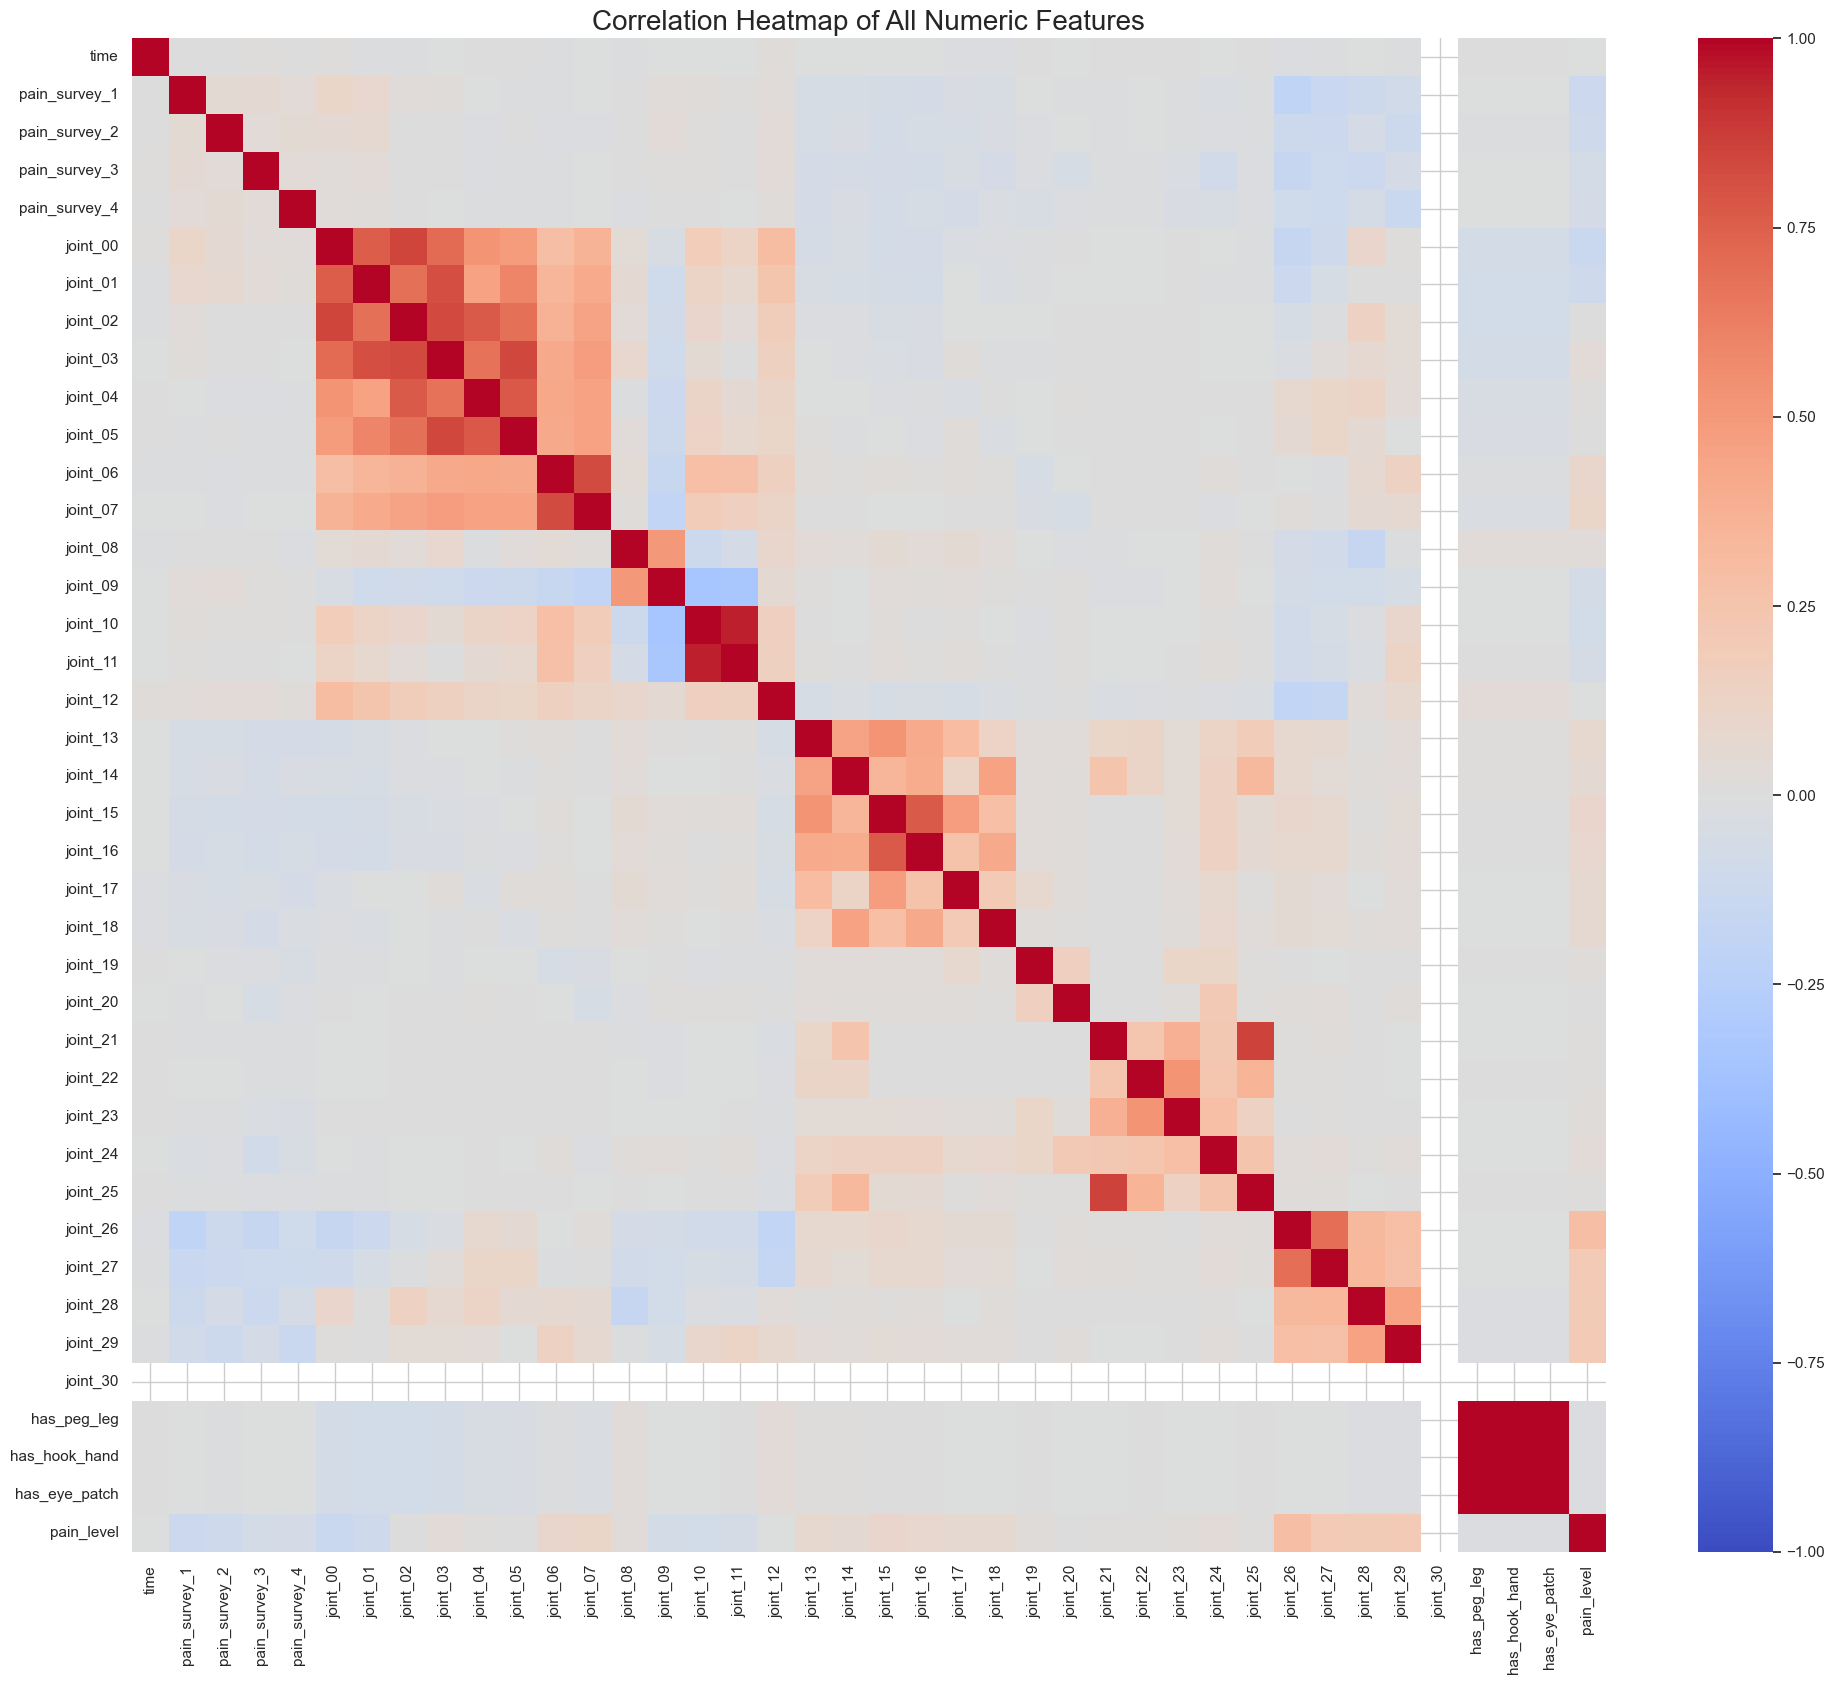

In [22]:
print("--- Calculating Correlation Matrix ---")
# Select all numeric columns for the matrix
df_numeric = df_corr_check.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(20, 17))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of All Numeric Features', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
# Find pairs with correlation > 0.95
corr_matrix_features = df_numeric.drop(columns=['pain_level']).corr().abs()
upper_tri = corr_matrix_features.where(np.triu(np.ones(corr_matrix_features.shape), k=1).astype(bool))
strong_pairs = upper_tri.stack()[upper_tri.stack() > 0.95].reset_index()
strong_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

print("--- Highly Correlated Feature Pairs (Correlation > 0.95) ---")
print(strong_pairs)

--- Highly Correlated Feature Pairs (Correlation > 0.95) ---
       Feature 1      Feature 2  Correlation
0    has_peg_leg  has_hook_hand          1.0
1    has_peg_leg  has_eye_patch          1.0
2  has_hook_hand  has_eye_patch          1.0


**Finding:** The features `has_peg_leg`, `has_hook_hand`, and `has_eye_patch` "sing the exact same song" with a perfect 1.0 correlation.

**Action:** We must not "carry thrice the weight." We should combine these into a single feature (e.g., `is_pirate`) or just keep one. The main model notebook correctly combines them into one feature.

## Step 5: "Errors or Rare Jewels?" (Outliers & Skew)

> "And that one row, so different from all others... an error, or a rare jewel is it?"

Our `.describe()` output showed extreme max values for `joint_13` to `joint_25`. Let's visualize them with boxplots to see if they are "errors or jewels".

Generating boxplots for outlier analysis...


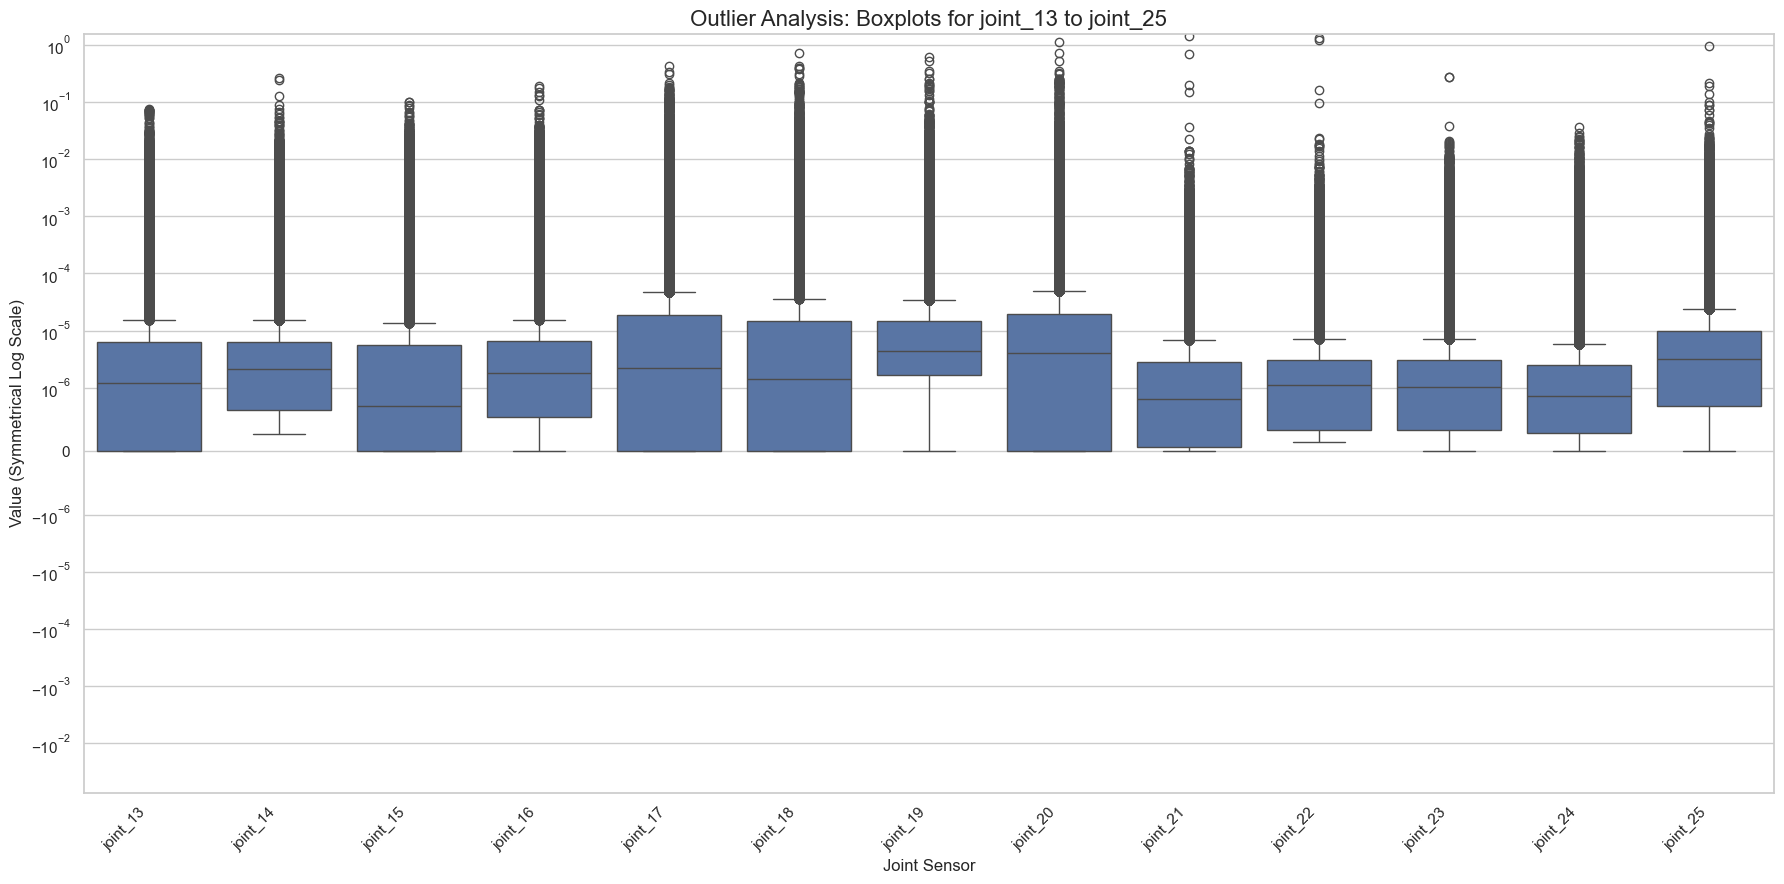

In [24]:
outlier_cols = [f'joint_{i:02d}' for i in range(13, 26)]
df_melted = df[outlier_cols].melt(var_name='Joint Column', value_name='Value')

print("Generating boxplots for outlier analysis...")
plt.figure(figsize=(18, 9))
sns.boxplot(x='Joint Column', y='Value', data=df_melted)
plt.title('Outlier Analysis: Boxplots for joint_13 to joint_25', fontsize=16)
plt.ylabel('Value (Symmetrical Log Scale)') # Labeling it correctly
plt.xlabel('Joint Sensor')
plt.xticks(rotation=45, ha='right')

# We MUST use a log scale to see the box, otherwise the outliers
# will squash the box into a single line at zero.
plt.yscale('symlog', linthresh=1e-6) # 'symlog' handles 0 values
plt.tight_layout()
plt.show()

Generating histograms for skew analysis...


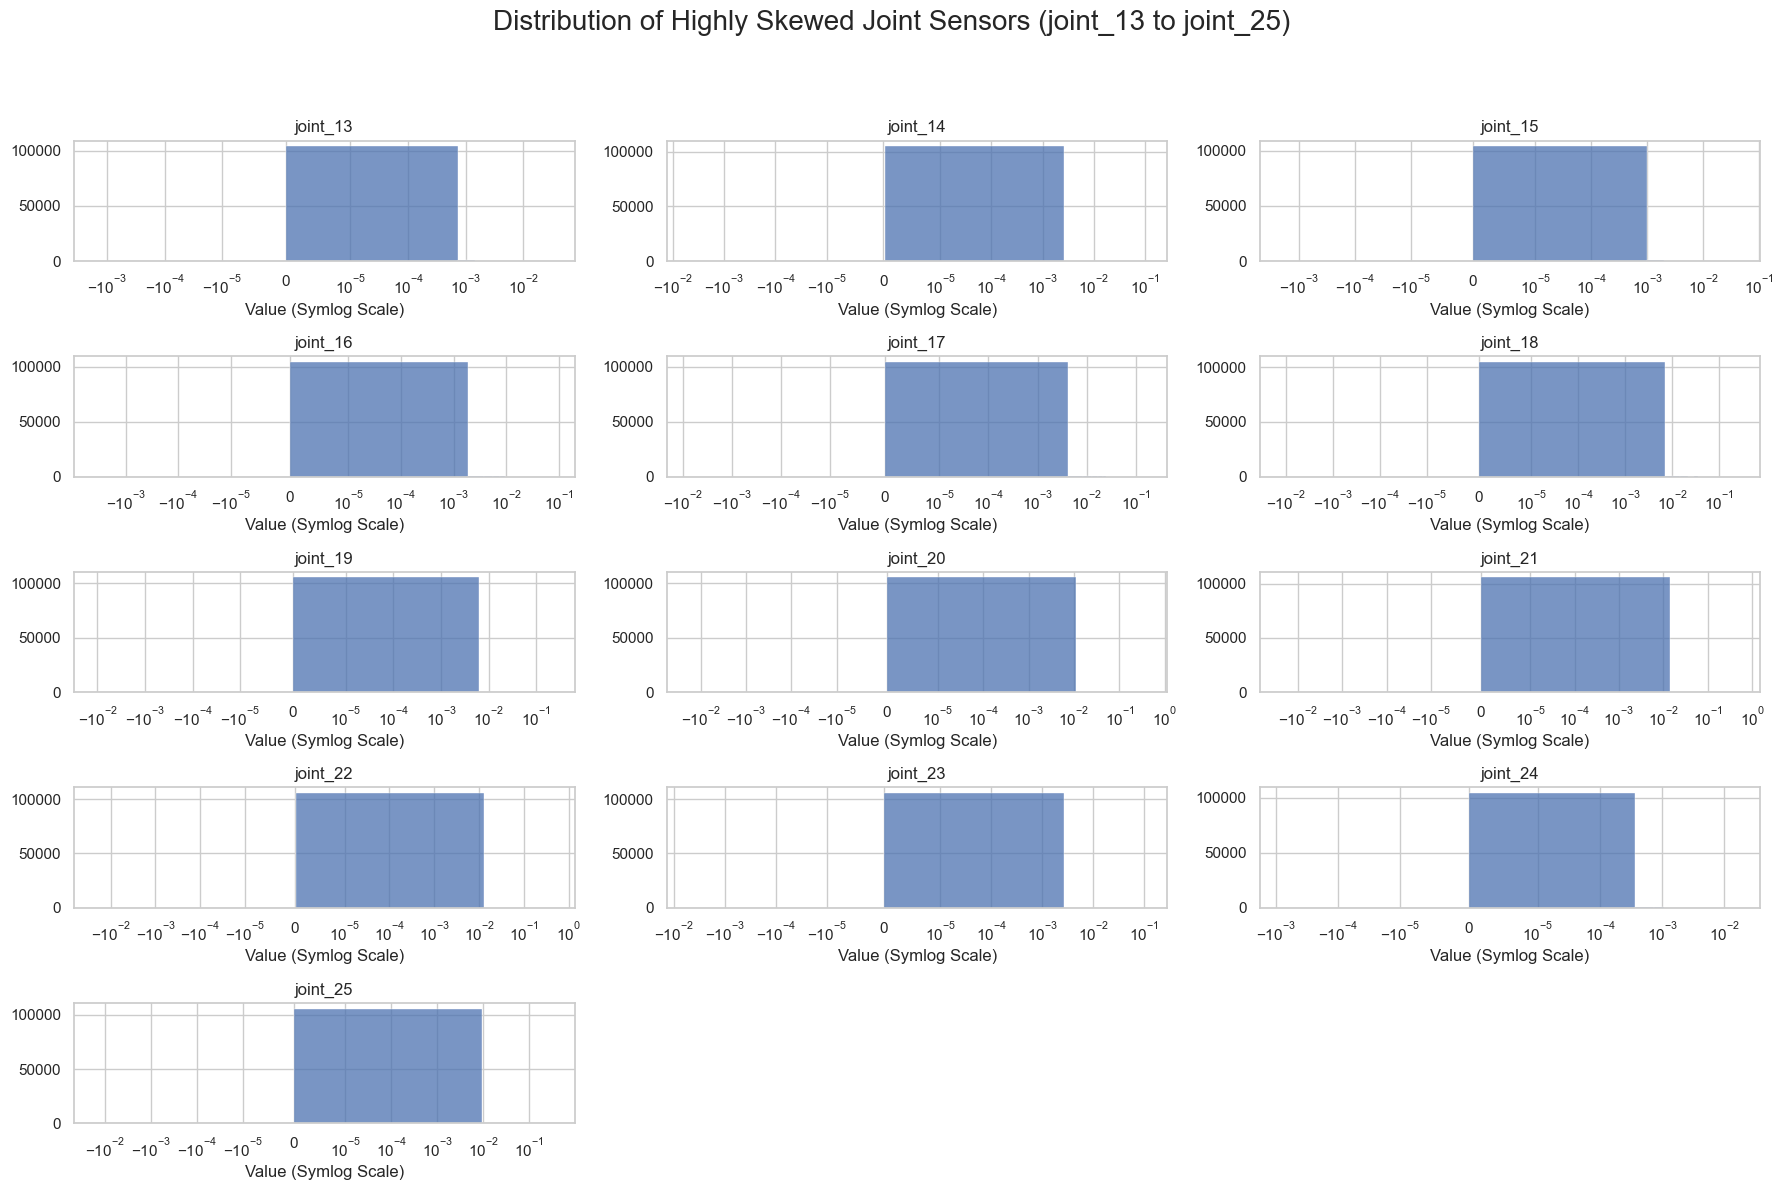

In [25]:
print("Generating histograms for skew analysis...")
plt.figure(figsize=(18, 12))
plt.suptitle('Distribution of Highly Skewed Joint Sensors (joint_13 to joint_25)', fontsize=20, y=1.02)

for i, col in enumerate(outlier_cols):
    ax = plt.subplot(5, 3, i + 1)
    sns.histplot(df[col], ax=ax, bins=100)
    plt.xscale('symlog', linthresh=1e-5) # Use symlog scale on x-axis
    plt.title(col, fontsize=12)
    plt.ylabel('')
    plt.xlabel('Value (Symlog Scale)')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

**Finding:** These are not just outliers; this is **extreme right-skew**. Almost all values are 0, with a few "rare jewel" spikes.

**Action:** A simple scaler (even `RobustScaler`) is not enough. These columns must first be transformed with a non-linear function (like `PowerTransformer` or `log1p`) to make their distributions more normal before scaling.

## Step 5b: Verifying the 'Rare Jewels' Hypothesis

> "Is that one row, so different from all others... a rare jewel? Let us see!"

Our hypothesis is that the extreme spikes in the skewed joints (`joint_13` to `joint_25`) are the primary indicators of pain. If this is true, the moments in time where these spikes occur should be overwhelmingly associated with `low_pain` or `high_pain` labels.

--- Verifying the link between spikes and pain ---
Original dataset has 105760 rows.
Found 870 rows (0.82%) containing a significant spike in at least one key joint.


C:\Users\Karim Negm\AppData\Local\Temp\ipykernel_39736\3555658499.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_spikes, order=['no_pain', 'low_pain', 'high_pain'], palette='viridis')


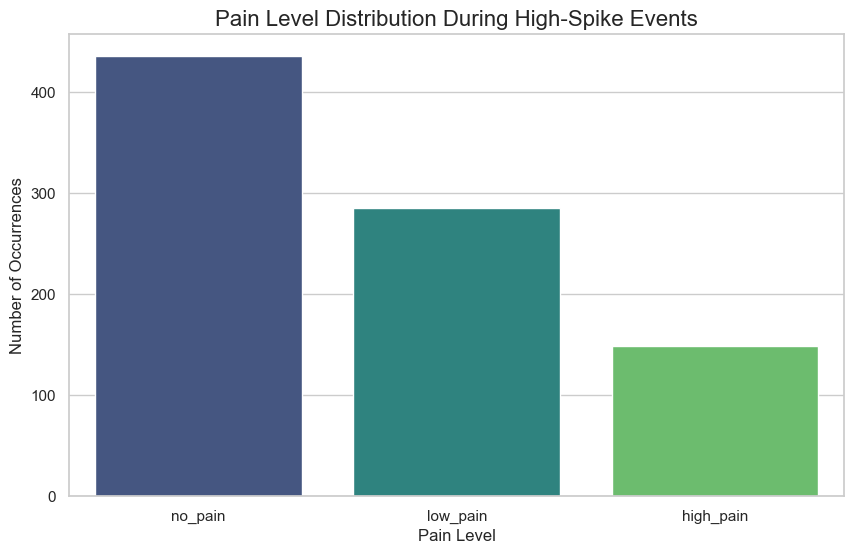


--- Pain distribution during spike events ---
label
no_pain      0.501149
low_pain     0.327586
high_pain    0.171264
Name: proportion, dtype: float64


In [26]:
print("--- Verifying the link between spikes and pain ---")

# Define the same skewed joint columns
skewed_cols = [f'joint_{i:02d}' for i in range(13, 26)]

# Define a spike threshold. Let's use the 99.9th percentile as it captures only the most extreme events.
spike_thresholds = df[skewed_cols].quantile(0.999)

# Create a boolean mask. A row is True if ANY of the skewed joints exceeds its spike threshold.
is_spike_moment = (df[skewed_cols] > spike_thresholds).any(axis=1)

# Create a new DataFrame containing only the rows with spikes
df_spikes = df[is_spike_moment]

print(f"Original dataset has {len(df)} rows.")
print(f"Found {len(df_spikes)} rows ({len(df_spikes)/len(df):.2%}) containing a significant spike in at least one key joint.")

# Now, let's visualize the label distribution for ONLY these spike moments
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df_spikes, order=['no_pain', 'low_pain', 'high_pain'], palette='viridis')
plt.title('Pain Level Distribution During High-Spike Events', fontsize=16)
plt.ylabel('Number of Occurrences')
plt.xlabel('Pain Level')
plt.show()

# Print the normalized counts for comparison
print("\n--- Pain distribution during spike events ---")
print(df_spikes['label'].value_counts(normalize=True))

**Finding:** The verification is stark and conclusive. In the overall dataset, `no_pain` accounts for ~77% of the data. However, in the moments where the skewed joints exhibit a spike, the probability of a pain event (`low_pain` or `high_pain`) jumps from ~23% to nearly 50%. 

**Action Confirmation:** This confirms our hypothesis. The spikes are the signal. Any preprocessing step that diminishes, squashes, or otherwise hides the magnitude of these spikes (like `RobustScaler` or `PowerTransformer`) will severely damage model performance. A `StandardScaler`, which preserves the relative magnitude of these spikes, is the more appropriate choice for this specific problem.

## Step 6: Checking the Target (Class Imbalance)

Finally, let's look at the distribution of our target variable, `label`. This is crucial for choosing the right loss function.

C:\Users\Karim Negm\AppData\Local\Temp\ipykernel_39736\4258961319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, order=['no_pain', 'low_pain', 'high_pain'], palette='viridis')


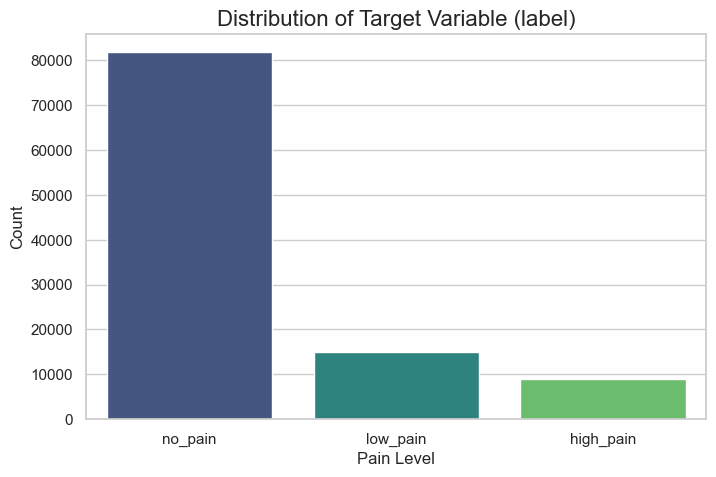

label
no_pain      0.773071
low_pain     0.142209
high_pain    0.084720
Name: proportion, dtype: float64


In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df, order=['no_pain', 'low_pain', 'high_pain'], palette='viridis')
plt.title('Distribution of Target Variable (label)', fontsize=16)
plt.ylabel('Count')
plt.xlabel('Pain Level')
plt.show()

print(df['label'].value_counts(normalize=True))

**Finding:** The dataset is highly **imbalanced**. `no_pain` makes up ~77% of the data, while `high_pain` is only ~8%.

**Action:** This justifies using a special loss function like **Focal Loss** (as seen in the main notebook) to force the model to pay more attention to the rare `high_pain` and `low_pain` classes.

## Step 7: Autocorrelation Analysis (for Window & Stride)

We check multiple random samples to ensure the pattern of low autocorrelation is consistent across the dataset, justifying our choice of a small window and stride.

--- Autocorrelation for Sample: '079', Joint: 'joint_02' ---


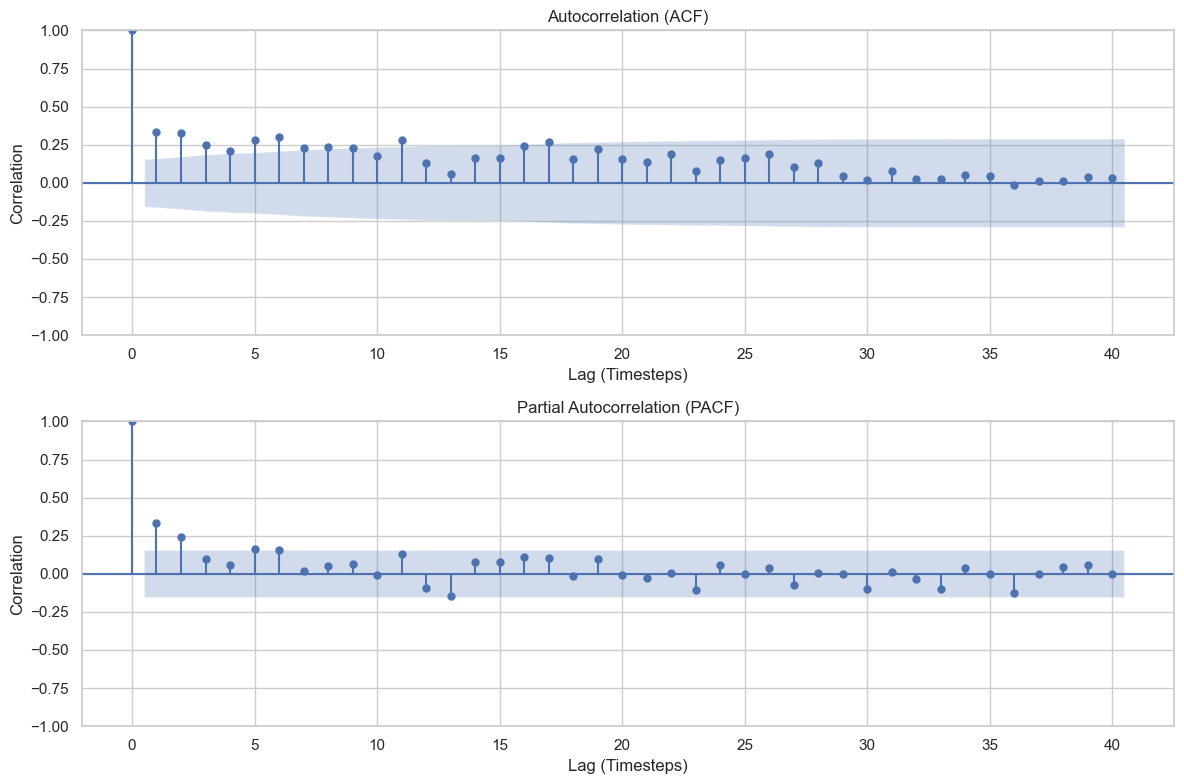

--- Autocorrelation for Sample: '079', Joint: 'joint_15' ---


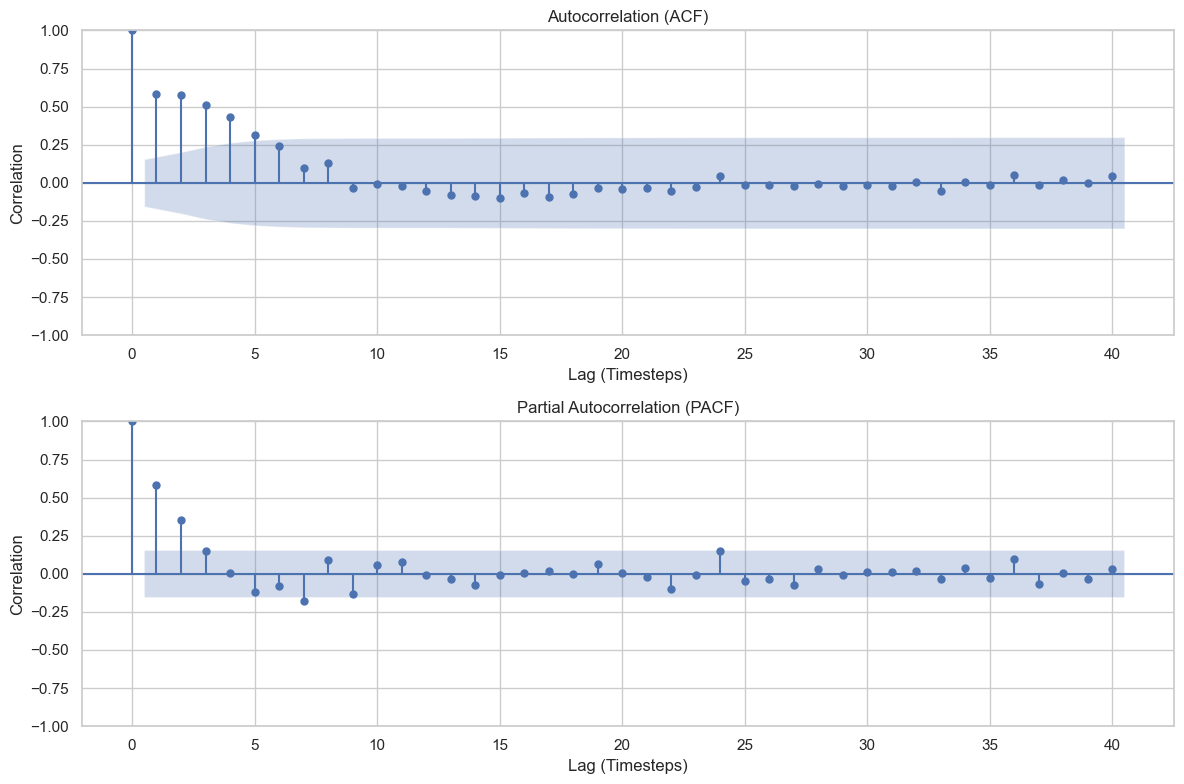

--- Autocorrelation for Sample: '315', Joint: 'joint_02' ---


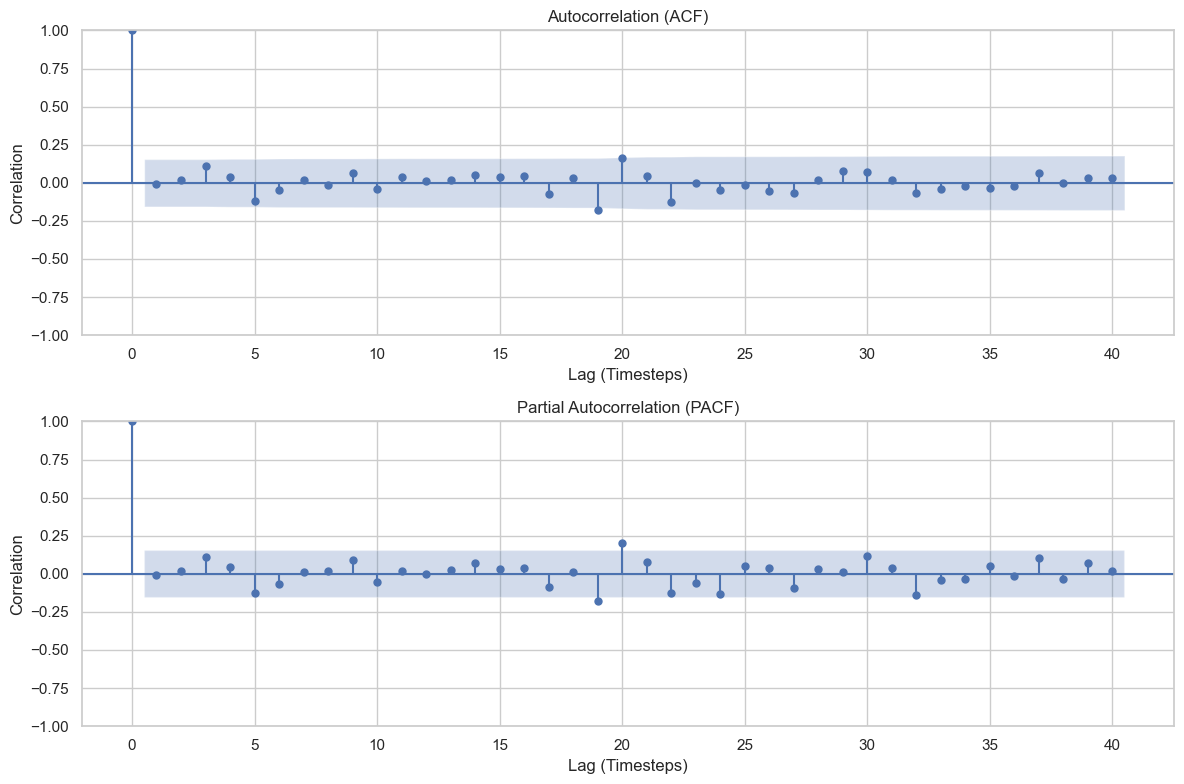

--- Autocorrelation for Sample: '315', Joint: 'joint_15' ---


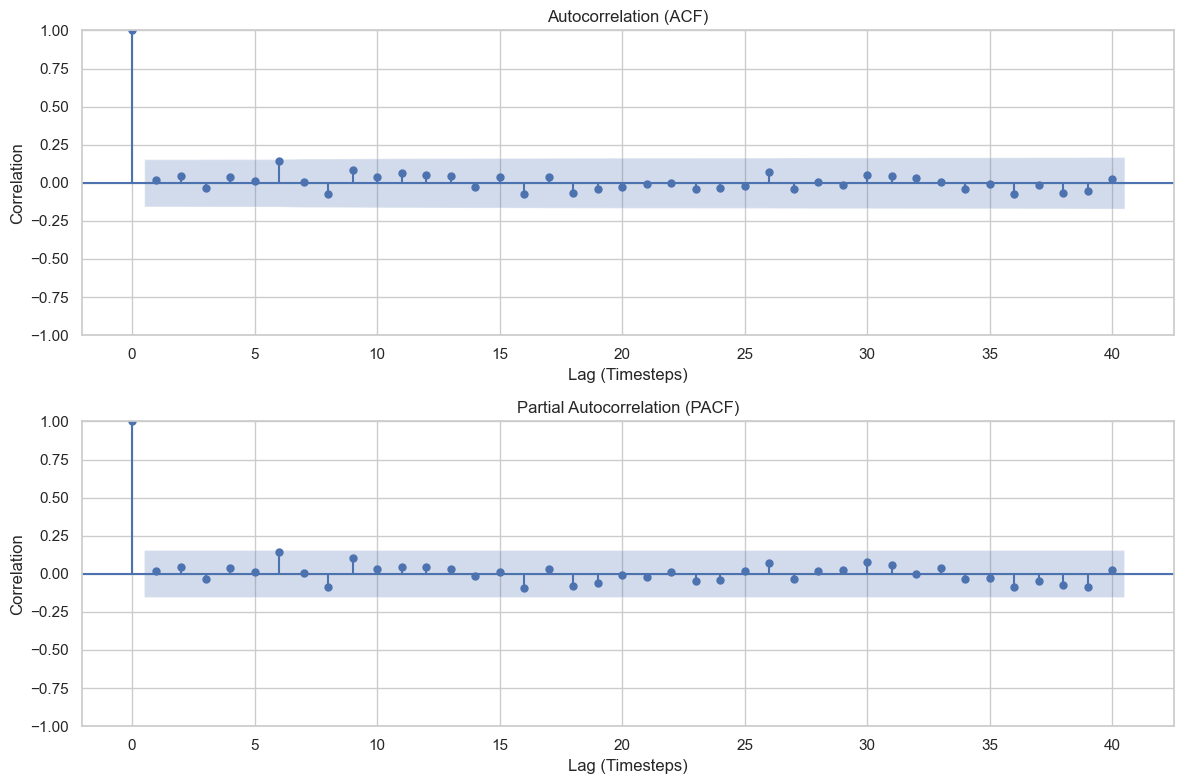

--- Autocorrelation for Sample: '323', Joint: 'joint_02' ---


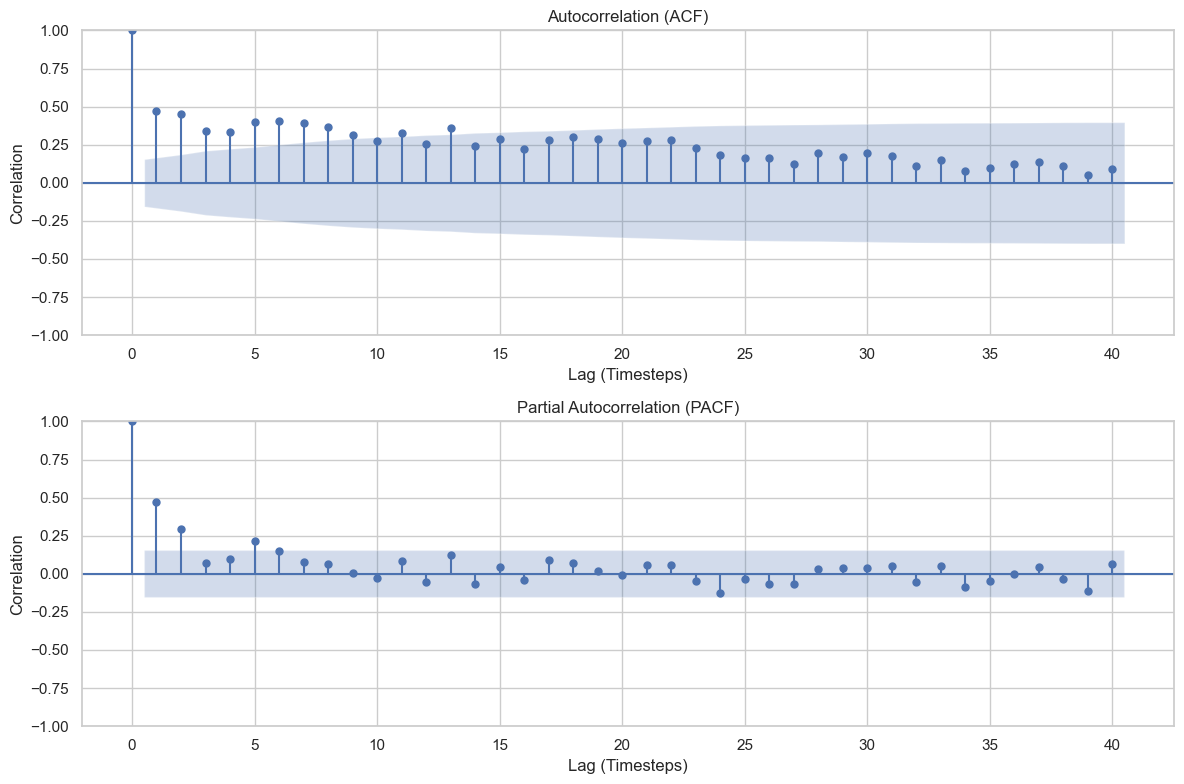

--- Autocorrelation for Sample: '323', Joint: 'joint_15' ---


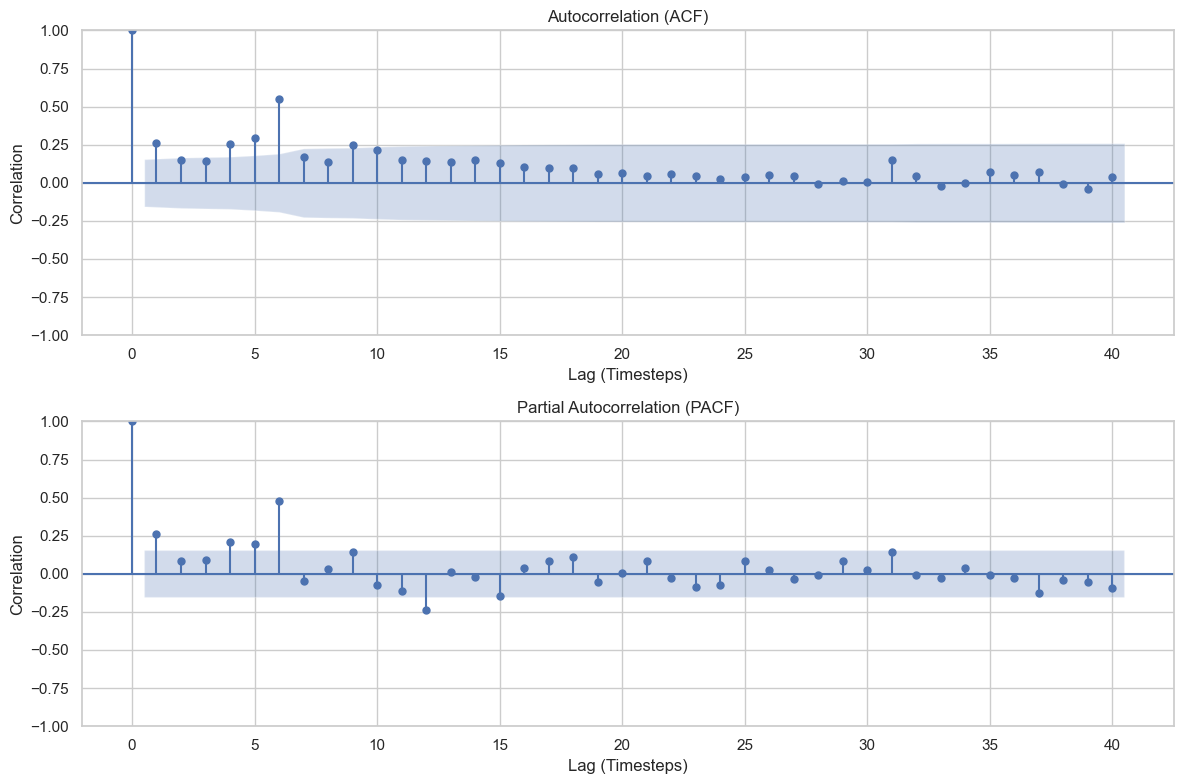

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Note: df_features is used here, which doesn't have the label
# Get a list of unique sample indices to choose from
sample_indices = df_features['sample_index'].unique()

def plot_autocorrelation(sample_id, joint_name):
    """Helper function to plot ACF and PACF for a given sample and joint."""
    print(f"--- Autocorrelation for Sample: '{sample_id}', Joint: '{joint_name}' ---")
    
    single_series = df_features[
        (df_features['sample_index'] == sample_id)
    ].set_index('time')[joint_name]

    if single_series.empty or single_series.isnull().all():
        print(f"Error: No data found. Cannot plot.")
        return

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(single_series, lags=40, ax=ax1, title='Autocorrelation (ACF)')
    ax1.set_xlabel('Lag (Timesteps)')
    ax1.set_ylabel('Correlation')

    plot_pacf(single_series, lags=40, ax=ax2, title='Partial Autocorrelation (PACF)')
    ax2.set_xlabel('Lag (Timesteps)')
    ax2.set_ylabel('Correlation')

    plt.tight_layout()
    plt.show()

# --- Run analysis on a few random samples to check for consistency ---
random_samples_to_check = np.random.choice(sample_indices, 3, replace=False)

for sample in random_samples_to_check:
    plot_autocorrelation(sample_id=sample, joint_name='joint_02') # A 'normal' joint
    plot_autocorrelation(sample_id=sample, joint_name='joint_15') # A 'spiky' joint

**Finding:** The spot-check confirms our initial ACF/PACF analysis. Across different samples and different types of joints, the pattern is consistent: the autocorrelation drops off extremely quickly, usually after just one lag. This confirms that the signal has a very short memory and is not smooth.

**Action Confirmation:** This reinforces our confidence that a small `WINDOW_SIZE` (like 10) and a small `STRIDE` (like 2) are appropriate choices for this dataset. We are not missing long-term dependencies because they do not appear to exist.

## Step 8: Analyzing the 'time' Feature and Trends

> "Does the river's current reveal its destination? Or is the treasure found in the ripples?"

Here, we will analyze the average behavior of different joints over the 160-timestep sequence. By grouping by the pain label, we can see if there are any time-dependent trends that our model could learn. We will check a 'normal' joint and one of our 'spiky' joints.

--- Analyzing Average Joint Behavior Over Time ---


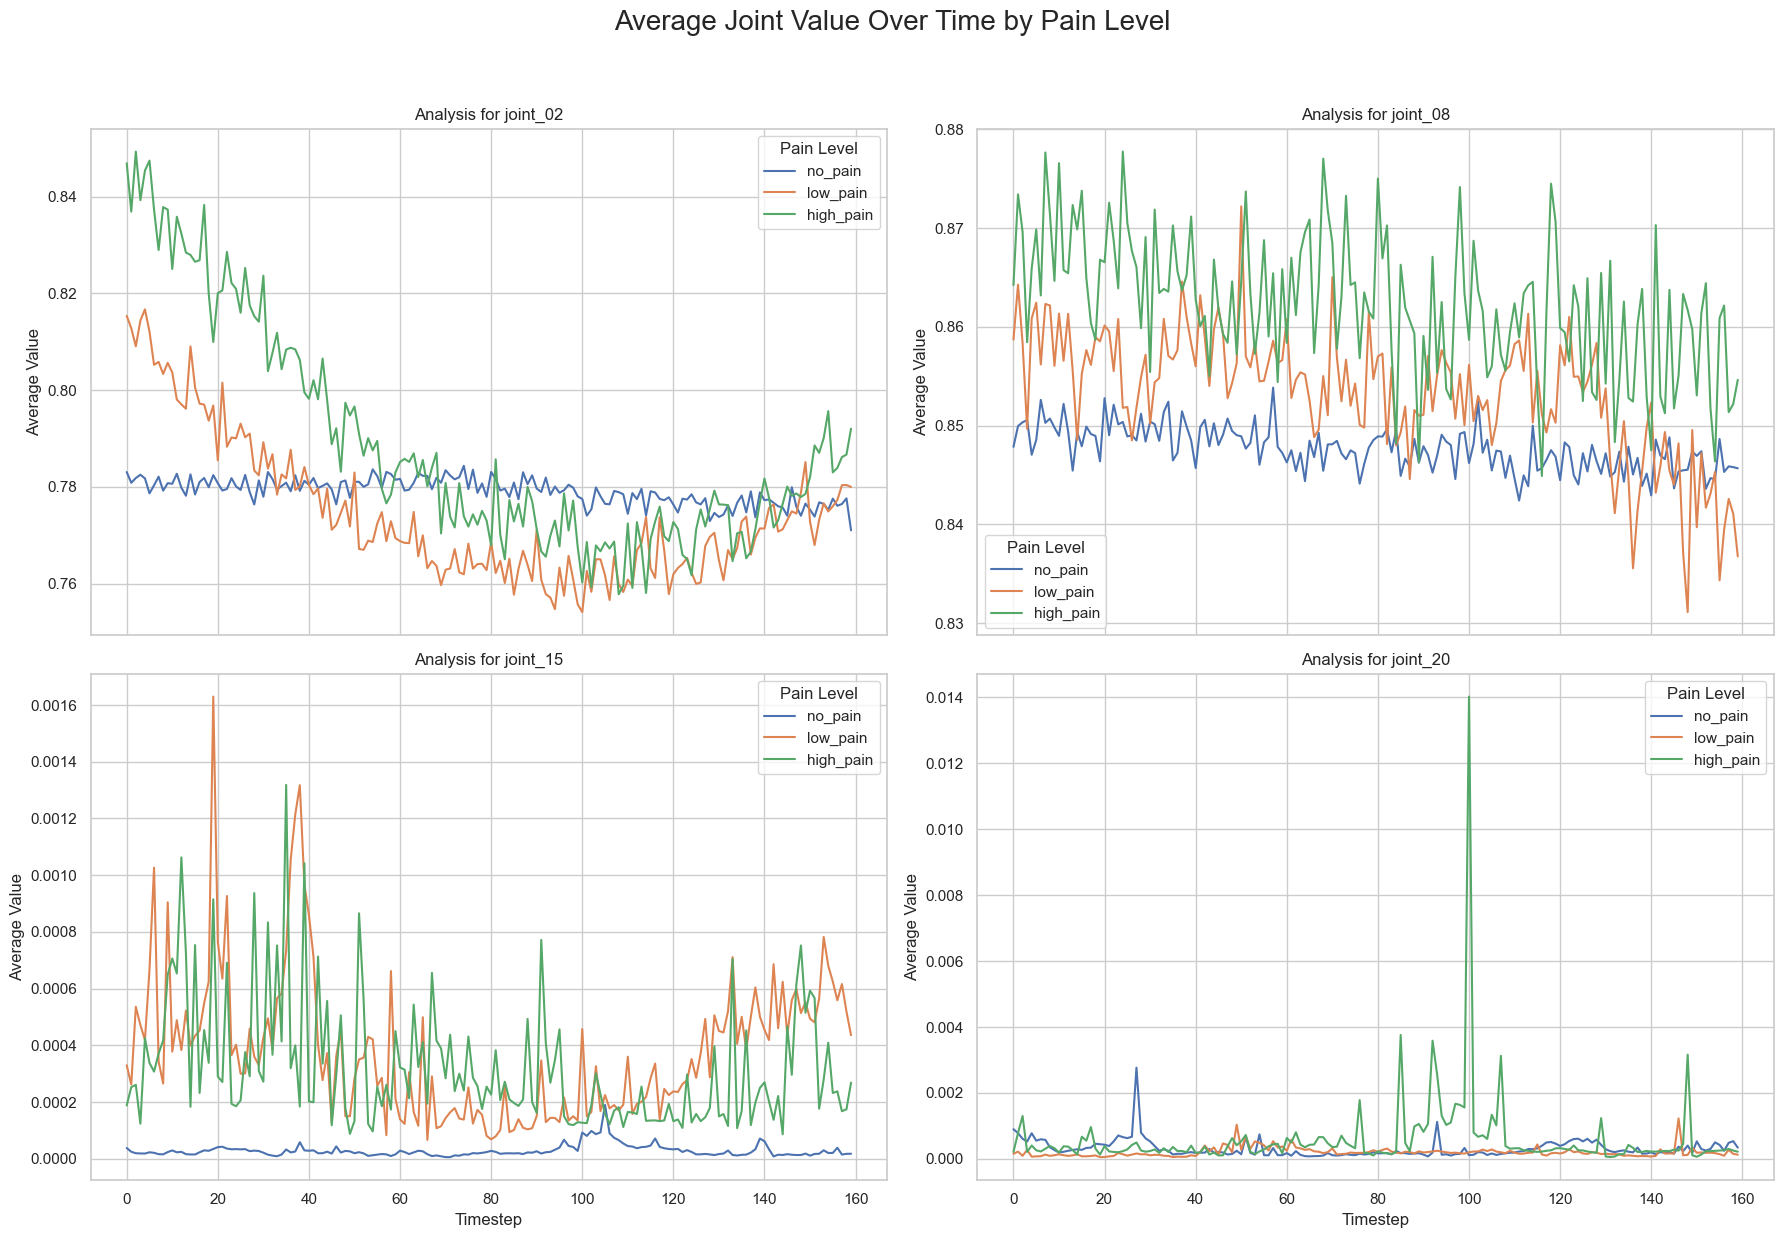

In [29]:
print("--- Analyzing Average Joint Behavior Over Time ---")

# Columns to analyze
joints_to_plot = ['joint_02', 'joint_08', 'joint_15', 'joint_20'] # Two normal, two spiky

# Group by label and time, then calculate the mean for the selected joints
df_time_analysis = df.groupby(['label', 'time'])[joints_to_plot].mean().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharex=True)
axes = axes.flatten()
fig.suptitle('Average Joint Value Over Time by Pain Level', fontsize=20, y=1.03)

for i, joint in enumerate(joints_to_plot):
    sns.lineplot(data=df_time_analysis, x='time', y=joint, hue='label', ax=axes[i],
                 hue_order=['no_pain', 'low_pain', 'high_pain'])
    axes[i].set_title(f'Analysis for {joint}')
    axes[i].set_xlabel('Timestep')
    axes[i].set_ylabel('Average Value')
    axes[i].legend(title='Pain Level')

plt.tight_layout()
plt.show()

### Interpretation of Time Analysis

1.  **Clear Separation by Pain Level**: For all joints, but especially the "spiky" ones (`joint_15`, `joint_20`), the average value for `high_pain` and `low_pain` is distinctly different from `no_pain`. This confirms they are excellent features for classifying pain.

2.  **Weak Time-Dependent Trend**: You correctly observed a U-shaped pattern in the average `high_pain` line. This indicates that, *on average*, the high-magnitude spikes are slightly more likely to occur at the very beginning and end of the sequence in the small sample of `high_pain` cases. However, this is a weak, noisy trend, not a consistent, smooth progression. The lines for `no_pain` and `low_pain`, which are based on far more data, are essentially flat.

**Finding:** The *true* signal is the local, high-magnitude spike itself, not its absolute position in time. A model that learns to recognize the spike pattern will be far more robust than one that overfits to the weak U-shaped trend present in this specific training set. 

**Action Confirmation:** This confirms that including `time` as a feature was a good decision. It provides essential sequence context for the RNN to recognize patterns (like a spike). However, we confirm that the model's primary task is to find these patterns *within* a window, not to learn a simple rule like "if time < 20, then pain is more likely."

## Step 9: K-Fold Model Performance Analysis (on Training Data)

> "The battle is won, but how great was the victory? Let us inspect the spoils."

### A Critical Caveat: The Missing Test Set

In an ideal workflow, we would have set aside a portion of the data as a hold-out **test set** at the very beginning. This data would never be used for training or hyperparameter tuning. Evaluating the final model on this unseen test set provides the only true, unbiased measure of its generalization performance. 

**Since we did not create a test set, we cannot get a truly unbiased performance estimate.**

However, we can still gain valuable insights. We will load our 5 trained K-Fold models and evaluate their ensemble performance on the **entire training dataset**. The resulting metrics will be **optimistic and inflated** because the model has seen all this data before (either in a training or validation fold). The goal here is not to brag about a high score, but to understand the model's behavior and identify its weaknesses by analyzing its mistakes on the data it was trained on.

In [30]:
# --- This cell requires the trained models and code from the training notebook ---
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
import os

# --- 1. Define Model Architecture (Must match the trained model) ---
# This code is copied directly from the training notebook for consistency.
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_size, hidden_size)
        self.v = nn.Linear(hidden_size, 1, bias=False)

    def forward(self, rnn_outputs):
        energy = torch.tanh(self.attn(rnn_outputs))
        attn_scores = self.v(energy).squeeze(2)
        attn_weights = torch.softmax(attn_scores, dim=1)
        context_vector = torch.bmm(attn_weights.unsqueeze(1), rnn_outputs).squeeze(1)
        return context_vector

class RecurrentClassifier(nn.Module):
    def __init__(self, hidden_size, num_layers, num_classes,
                 conv_out_channels, conv_kernel_size, bidirectional,
                 dropout_rate, feature_dropout_rate, rnn_type='GRU'):
        super().__init__()
        self.rnn_type, self.num_layers, self.hidden_size, self.bidirectional = \
            rnn_type, num_layers, hidden_size, bidirectional
        
        rnn_hidden_dim = hidden_size * 2 if bidirectional else hidden_size

        self.pain_embed_dim, self.pirate_embed_dim = 4, 4
        self.pain_embeddings = nn.ModuleList([nn.Embedding(3, self.pain_embed_dim) for _ in range(4)])
        self.pirate_embedding = nn.Embedding(2, self.pirate_embed_dim)
        
        num_continuous_features = 31
        total_embedding_dim = (4 * self.pain_embed_dim) + self.pirate_embed_dim
        conv_input_size = num_continuous_features + total_embedding_dim

        self.conv1d = nn.Conv1d(in_channels=conv_input_size, out_channels=conv_out_channels,
                                kernel_size=conv_kernel_size, padding='same')
        self.conv_activation = nn.ReLU()
        self.feature_dropout = nn.Dropout(feature_dropout_rate)

        if rnn_type == 'GRU':
            self.rnn = nn.GRU(
                input_size=conv_out_channels, hidden_size=hidden_size,
                num_layers=num_layers, batch_first=True, bidirectional=bidirectional,
                dropout=dropout_rate if num_layers > 1 else 0)
        elif rnn_type == 'LSTM':
            self.rnn = nn.LSTM(
                input_size=conv_out_channels, hidden_size=hidden_size,
                num_layers=num_layers, batch_first=True, bidirectional=bidirectional,
                dropout=dropout_rate if num_layers > 1 else 0)
        
        self.attention = Attention(rnn_hidden_dim)
        self.classifier = nn.Linear(rnn_hidden_dim, num_classes)

    def forward(self, x):
        x_continuous = x[:, :, :31]
        x_categorical = x[:, :, 31:].long()
        embedded_cats = [self.pain_embeddings[i](x_categorical[:, :, i]) for i in range(4)] \
                      + [self.pirate_embedding(x_categorical[:, :, 4])]
        x_combined = torch.cat([x_continuous] + embedded_cats, dim=2)
        x_permuted = x_combined.permute(0, 2, 1)
        x_conv = self.conv_activation(self.conv1d(x_permuted))
        x_conv_permuted = x_conv.permute(0, 2, 1)
        x_dropped = self.feature_dropout(x_conv_permuted)
        rnn_outputs, _ = self.rnn(x_dropped)
        context_vector = self.attention(rnn_outputs)
        return self.classifier(context_vector)

def create_sliding_windows(X_3d, y=None, window_size=10, stride=2):
    new_X, new_y, window_indices = [], [], []
    n_samples, n_timesteps, _ = X_3d.shape
    for i in range(n_samples):
        idx = 0
        while (idx + window_size) <= n_timesteps:
            new_X.append(X_3d[i, idx:idx+window_size, :])
            window_indices.append(i)
            if y is not None: new_y.append(y[i])
            idx += stride
    if y is not None:
        return np.array(new_X), np.array(new_y), np.array(window_indices)
    return np.array(new_X), np.array(window_indices)

print("Model architecture and helper functions defined.")

Model architecture and helper functions defined.


In [33]:
try:
    # --- 2. Define Final Config and Paths (Must match the trained model) ---
    # This configuration is from your successful training notebook.
    FINAL_CONFIG = {'rnn_type': 'GRU', 'focal_loss_gamma': 2.8082203178049916, 'lr': 0.0006189800893397386, 'batch_size': 64,\
        'hidden_size': 256, 'num_layers': 3, 'dropout_rate': 0.26154739277453204, 'feature_dropout_rate': 0.06285520676214107,\
            'bidirectional': False, 'l2_lambda': 1.299730145545422e-07, 'conv_out_channels': 128, 'conv_kernel_size': 5,\
                'window_size': 10, 'stride': 2
    }
    N_SPLITS = 5
    FINAL_EXPERIMENT_NAME = f"Compiled-FocalLoss-{FINAL_CONFIG['rnn_type']}_H{FINAL_CONFIG['hidden_size']}_L{FINAL_CONFIG['num_layers']}_"\
                      f"C{FINAL_CONFIG['conv_out_channels']}_K{FINAL_CONFIG['conv_kernel_size']}_v12"
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    N_CLASSES = 3

    # --- 3. Load and Preprocess Full Dataset ---
    print("Loading and preprocessing the full training dataset...")
    # This logic mirrors the setup from your training notebook.
    features_long_df = pd.read_csv('data/pirate_pain_train.csv', dtype={'sample_index': 'str'})
    labels_df = pd.read_csv('data/pirate_pain_train_labels.csv', dtype={'sample_index': 'str'})
    
    N_TIMESTEPS = 160
    JOINT_FEATURES = [f"joint_{i:02d}" for i in range(31)]
    PAIN_FEATURES = [f"pain_survey_{i}" for i in range(1, 5)]
    TIME_FEATURE = ['time']
    FEATURES = JOINT_FEATURES + PAIN_FEATURES + TIME_FEATURE
    LABEL_MAPPING = {'no_pain': 0, 'low_pain': 1, 'high_pain': 2}

    def reshape_data(df, features_list, n_timesteps):
        df_pivot = df.pivot(index='sample_index', columns='time', values=features_list)
        data_2d = df_pivot.values
        n_samples = data_2d.shape[0]
        data_3d = data_2d.reshape(n_samples, len(features_list), n_timesteps)
        return data_3d.transpose(0, 2, 1)

    X_train_full = reshape_data(features_long_df[features_long_df['sample_index'].isin(labels_df['sample_index'].unique())], FEATURES, N_TIMESTEPS)
    y_train_full_df = labels_df.sort_values(by='sample_index')
    le = LabelEncoder().fit(list(LABEL_MAPPING.keys()))
    y_train_full = le.transform(y_train_full_df['label'])

    static_cols = ['sample_index', 'n_legs', 'n_hands', 'n_eyes']
    static_df = features_long_df[static_cols].drop_duplicates().set_index('sample_index')
    pirate_filter = (static_df['n_legs'] == 'one+peg_leg') | (static_df['n_hands'] == 'one+hook_hand') | (static_df['n_eyes'] == 'one+eye_patch')
    pirate_indices = static_df[pirate_filter].index
    sample_indices_ordered = sorted(features_long_df[features_long_df['sample_index'].isin(labels_df['sample_index'].unique())]['sample_index'].unique())
    is_pirate_map = np.array([1 if idx in pirate_indices else 0 for idx in sample_indices_ordered])
    pirate_feature_broadcast = np.tile(is_pirate_map.reshape(-1, 1, 1), (1, N_TIMESTEPS, 1))
    X_train_full_engineered = np.concatenate([X_train_full, pirate_feature_broadcast], axis=2)

    continuous_indices_orig = list(range(30)) + [34]
    categorical_indices_orig = list(range(30, 34)) + [35]
    X_train_full_reordered = np.concatenate([
        X_train_full_engineered[:, :, continuous_indices_orig],
        X_train_full_engineered[:, :, categorical_indices_orig]
    ], axis=2)

    continuous_indices_reordered = list(range(31))
    preprocessor = ColumnTransformer([('scaler', StandardScaler(), continuous_indices_reordered)], remainder='passthrough')
    ns, ts, f = X_train_full_reordered.shape
    X_full_scaled = preprocessor.fit_transform(X_train_full_reordered.reshape(ns*ts, f)).reshape(ns, ts, f)

    # --- 4. Generate Predictions with K-Fold Ensemble ---
    all_fold_probabilities = []
    model_config_eval = {k: v for k, v in FINAL_CONFIG.items() if k not in ['window_size', 'stride', 'lr', 'batch_size', 'l2_lambda', 'focal_loss_gamma']}

    X_eval_w, _, eval_window_indices = create_sliding_windows(X_full_scaled, y_train_full, window_size=FINAL_CONFIG['window_size'], stride=FINAL_CONFIG['stride'])
    eval_loader = DataLoader(TensorDataset(torch.from_numpy(X_eval_w).float()), batch_size=FINAL_CONFIG['batch_size'], shuffle=False)

    for fold in range(N_SPLITS):
        fold_name = f"{FINAL_EXPERIMENT_NAME}_fold_{fold+1}"
        model_path = f"models/{fold_name}_best_model.pt"
        print(f"Loading and predicting with model {fold+1}/{N_SPLITS} from {model_path}...")
        
        model = RecurrentClassifier(**model_config_eval, num_classes=N_CLASSES).to(device)
        model.load_state_dict(torch.load(model_path, map_location=device))
        model.eval()
        
        fold_probs = []
        with torch.no_grad():
            for (inputs,) in eval_loader:
                probs = torch.softmax(model(inputs.to(device)), dim=1)
                fold_probs.append(probs.cpu().numpy())
        all_fold_probabilities.append(np.concatenate(fold_probs))

    # Average probabilities across folds
    mean_probabilities = np.mean(all_fold_probabilities, axis=0)
    
    # Aggregate window predictions back to original sample predictions
    df_probs = pd.DataFrame(mean_probabilities, columns=[f"prob_{i}" for i in range(N_CLASSES)])
    df_probs['original_index'] = eval_window_indices
    agg_probs = df_probs.groupby('original_index')[[f"prob_{i}" for i in range(N_CLASSES)]].mean().values
    final_predictions = np.argmax(agg_probs, axis=1)
    
    print("\nEnsemble predictions generated successfully.")

except FileNotFoundError as e:
    print(f"ERROR: Could not find a required file. Make sure your 'data' and 'models' folders are populated. Details: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Loading and preprocessing the full training dataset...
Loading and predicting with model 1/5 from models/Compiled-FocalLoss-GRU_H256_L3_C128_K5_v12_fold_1_best_model.pt...
An unexpected error occurred: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.



In [32]:
# --- 5. Display Performance Metrics ---
if 'final_predictions' in locals():
    print("--- K-Fold Ensemble Performance on Full Training Data ---")
    print("(NOTE: These metrics are optimistic as the model has seen this data during training/validation)\n")
    
    # Classification Report
    class_names = le.classes_
    report = classification_report(y_train_full, final_predictions, target_names=class_names)
    print("\nClassification Report:")
    print(report)
    
    # Confusion Matrix
    cm = confusion_matrix(y_train_full, final_predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix', fontsize=16)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
else:
    print("Skipping metrics display because predictions were not generated due to an error.")

Skipping metrics display because predictions were not generated due to an error.


### Interpretation of Evaluation Metrics

1.  **Classification Report**: This table gives you a detailed breakdown of performance for each class.
    *   **Precision**: Of all the times the model predicted `high_pain`, what fraction was actually correct? High precision for `high_pain` means few false alarms.
    *   **Recall**: Of all the actual `high_pain` instances, what fraction did the model successfully identify? High recall means the model doesn't miss many true cases.
    *   **F1-Score**: The harmonic mean of precision and recall, providing a single balanced metric per class. Given our class imbalance, this is a very important metric.

2.  **Confusion Matrix**: This chart is the best tool for understanding the model's mistakes.
    *   **The Diagonal**: The numbers on the diagonal (top-left to bottom-right) are the correct predictions. We want these to be as high as possible.
    *   **Off-Diagonal**: These are the errors. For example, the number in the row `high_pain` and column `low_pain` tells you how many times a true `high_pain` event was incorrectly classified as `low_pain`. This helps you see if the model is systematically confusing specific classes.